# Author : Sangeetha K

## Problem statement: Prediction using supervised Machine learning
## Predict the percentage of the student obtained  based on the no. of study hours.

In [1]:
# Import all the necessary libraries for the model development

import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [85]:
# Load the dataset using the url provided.

data = "http://bit.ly/w-data"
df= pd.read_csv(data)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Hours,Scores


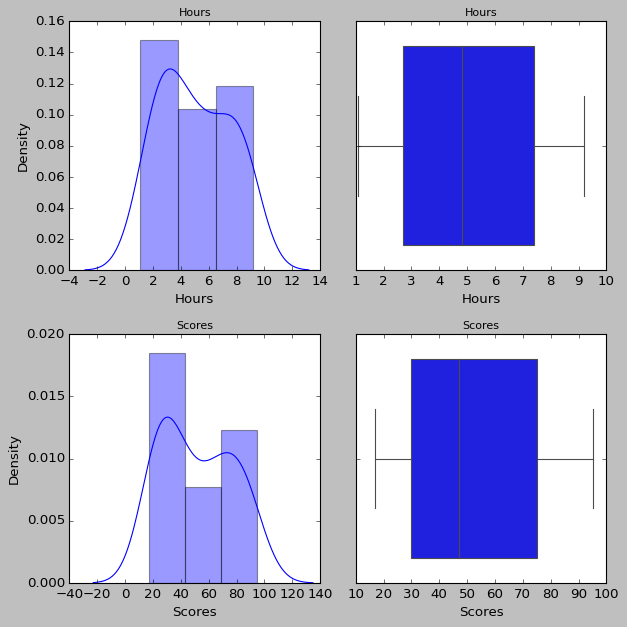

In [93]:
# Univariate analysis
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(8,8)

a = sns.distplot(df['Hours'] , ax=axes[0][0])
a.set_title("Hours",fontsize=10)
a = sns.boxplot(df['Hours'] , orient = "v" , ax=axes[0][1])
a.set_title("Hours",fontsize=10)

a = sns.distplot(df['Scores'] , ax=axes[1][0])
a.set_title("Scores",fontsize=10)
a = sns.boxplot(df['Scores'] , orient = "v" , ax=axes[1][1])
a.set_title("Scores",fontsize=10)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

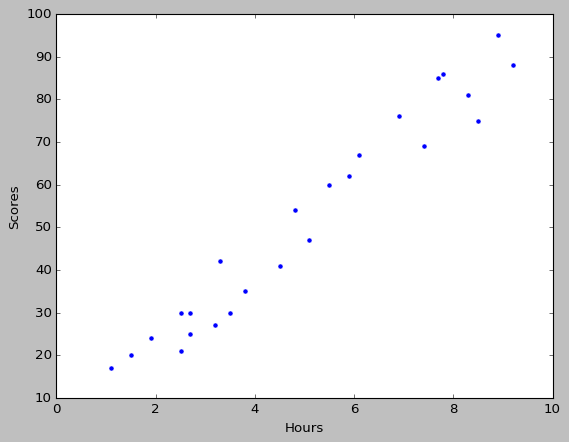

In [86]:
# Bivariate analysis
sns.scatterplot(df['Hours'],df['Scores'])

#### - The above plot shows that as the study hours increases, the scores pbtained by the students also increase.
#### - There are no outliers in the data provided
#### - The data seems to be normally distributed.

## Train and test data split

In [94]:
# Copy all the predictor variables into X dataframe
X = df.drop('Scores', axis=1)
# Copy target into the y dataframe.  
y = df['Scores']

In [153]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 , random_state=0)

In [154]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (21, 1)
X_test (4, 1)
train_labels (21,)
test_labels (4,)


# Linear regression model 

In [155]:

# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression  

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [156]:
## RMSE Value
import math 
mse_train = np.mean((regression_model.predict(X_train)-y_train)**2)
print('mse_train',math.sqrt(mse_train))
mse_test = np.mean((regression_model.predict(X_test)-y_test)**2)
print('mse_test',math.sqrt(mse_test))

mse_train 5.434129116316338
mse_test 5.1723841795395336


In [157]:
# R square on training and testing data
print('Train set accuracy :',regression_model.score(X_train, y_train))
print('Test set accuracy :',regression_model.score(X_test, y_test))

Train set accuracy : 0.9516157390656382
Test set accuracy : 0.9267527498952749


In [158]:
# predict the marks obtained for 9.25 study hrs based on the above model.
study_hrs = 9.25
y_pred = regression_model.predict([[study_hrs]])

In [159]:
print('The no. of study hours per day: {}'.format(study_hrs))
print('Scores obtained: {}'.format(y_pred[0]))

The no. of study hours per day: 9.25
Scores obtained: 93.79402490359651


### The Linear equation for the model is:

In [160]:
print('Scores = (', regression_model.coef_[0],'* Hours) +', regression_model.intercept_)

Scores = ( 9.918306678342628 * Hours) + 2.049688128927201
